In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
#%matplotlib inline
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [162]:
values = np.genfromtxt('C:\Users\WillemT\Documents\Work\Projects\Projects 2015\Trescimo - Home Energy Management\\
Results_Analysis\AMI Data Analysis\Python\Combined_AMI_Consumption_Data.csv', delimiter=',')

#A_values = pd.DataFrame(values[1:,1:2].reshape(len(values[1:,1:2])/48,48))
#B_values = pd.DataFrame(values[1:,2:3].reshape(len(values[1:,2:3])/48,48))
#C_values = pd.DataFrame(values[1:,3:4].reshape(len(values[1:,3:4])/48,48))
#D_values = pd.DataFrame(values[1:,4:5].reshape(len(values[1:,4:5])/48,48))
#E_values = pd.DataFrame(values[1:,5:6].reshape(len(values[1:,5:6])/48,48))
#F_values = pd.DataFrame(values[1:,6:7].reshape(len(values[1:,6:7])/48,48))

In [163]:
df = pd.read_csv('C:\Users\WillemT\Documents\Work\Projects\Projects 2015\Trescimo - Home Energy Management\Results_Analysis\\
AMI Data Analysis\Python\Combined_AMI_Consumption_Data.csv')
label = df.transpose()[0:1].values
def remove_time(item):
    return [item[0][:10]]
dates = [np.unique(pd.DataFrame(label).apply(remove_time).values[0])]
#times = [['00:00','00:30','01:00','01:30','02:00','02:30','03:00','03:30','04:00','04:30','05:00','05:30','06:00','06:30',\
#          '07:00','07:30','08:00','08:30','09:00','09:30','10:00','10:30','11:00','11:30','12:00','12:30','13:00','13:30',\
#          '14:00','14:30','15:00','15:30','16:00','16:30','17:00','17:30','18:00','18:30','19:00','19:30','20:00','20:30',\
#          '21:00','21:30','22:00','22:30','23:00','23:30']]

times = [['00:00','','','','','','03:00','','','','','','06:00','','','','','','09:00','','','','','','12:00','','','','','',
          '15:00','','','','','','18:00','','','','','','21:00','','','','','']]

times_t = zip(*times)
j = 0
for i in times_t:
    times_t[j] = i[0]
    j += 1

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V


C:\Users\WillemT\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


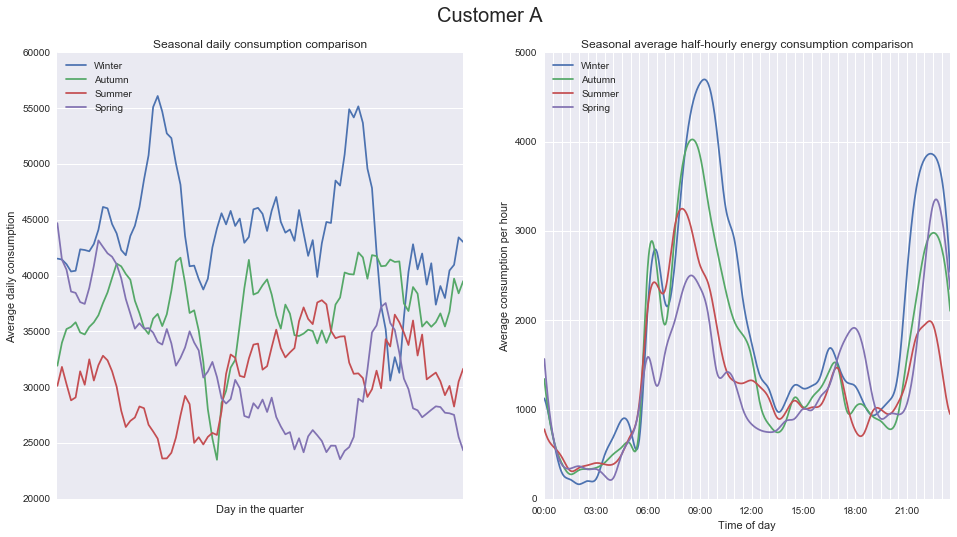

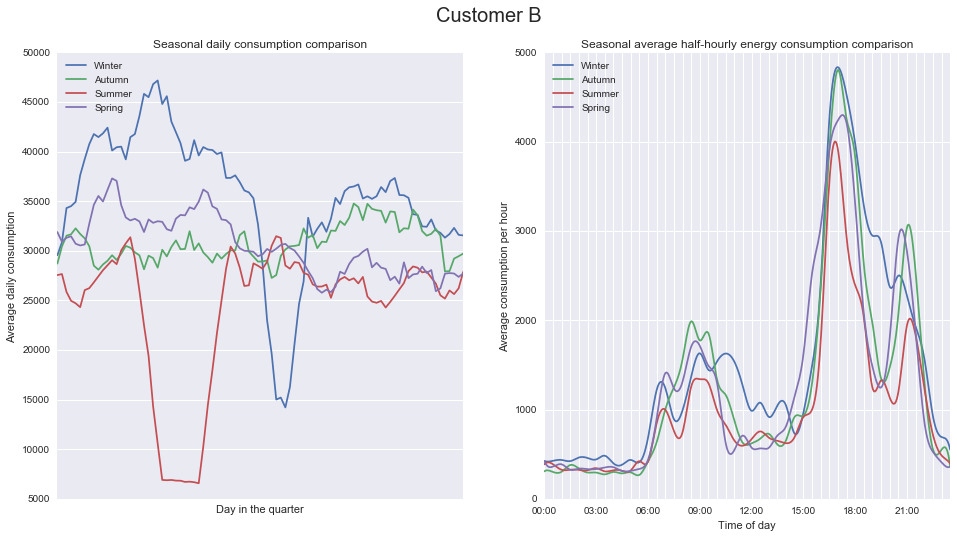

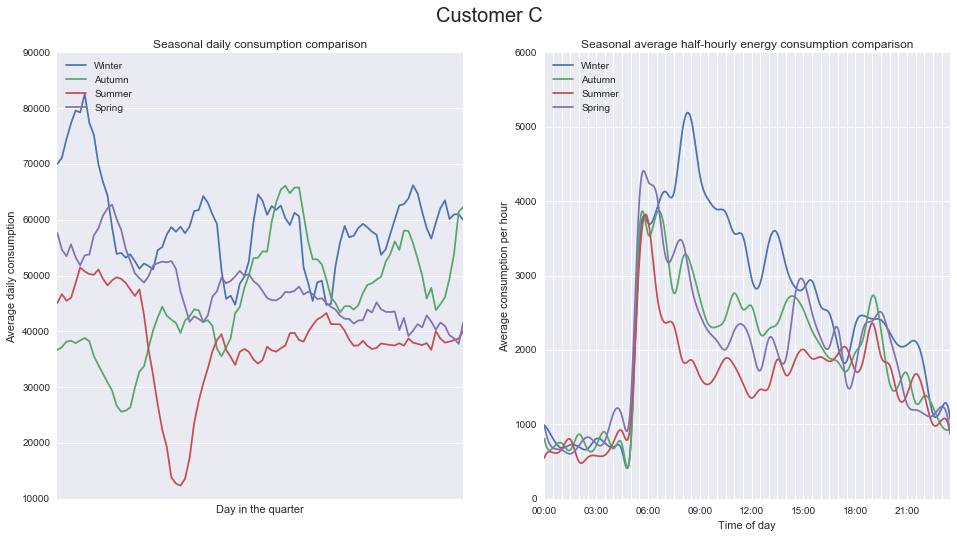

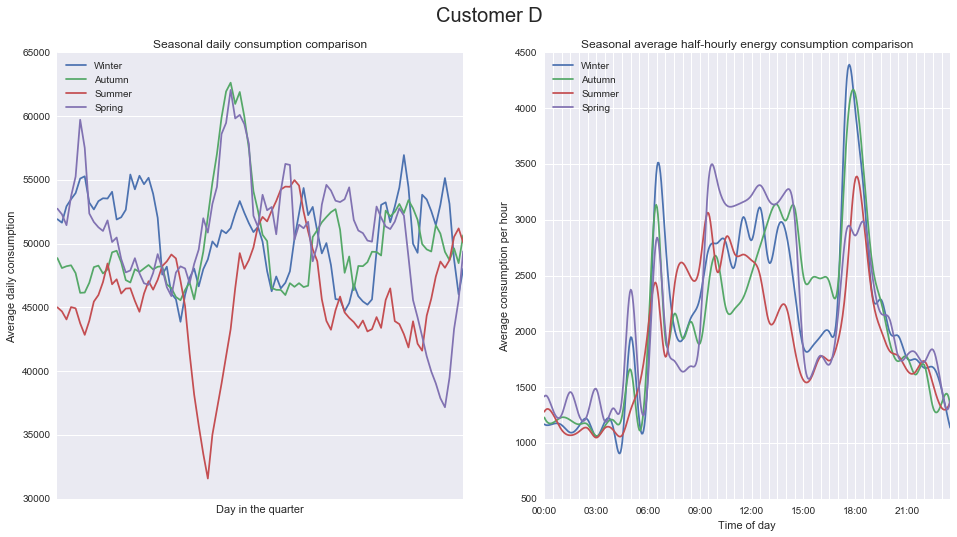

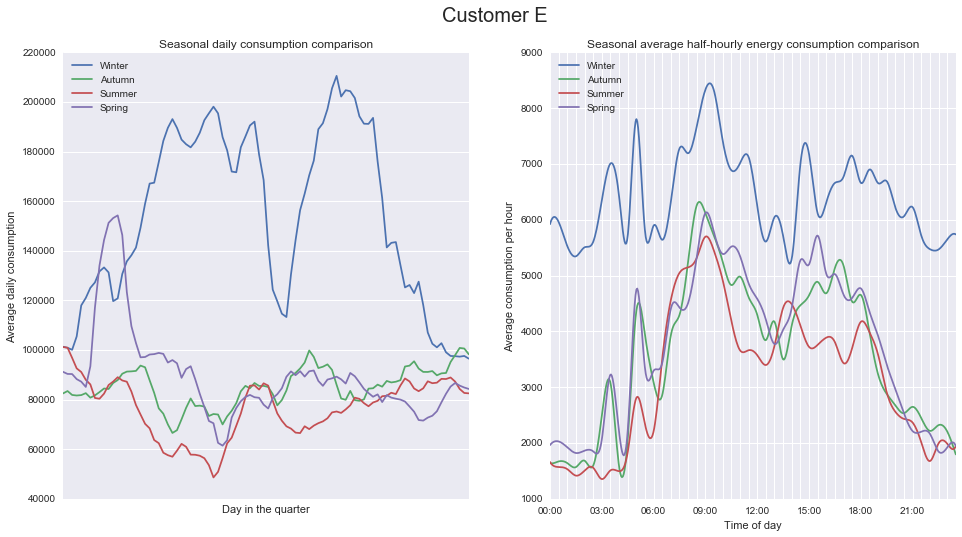

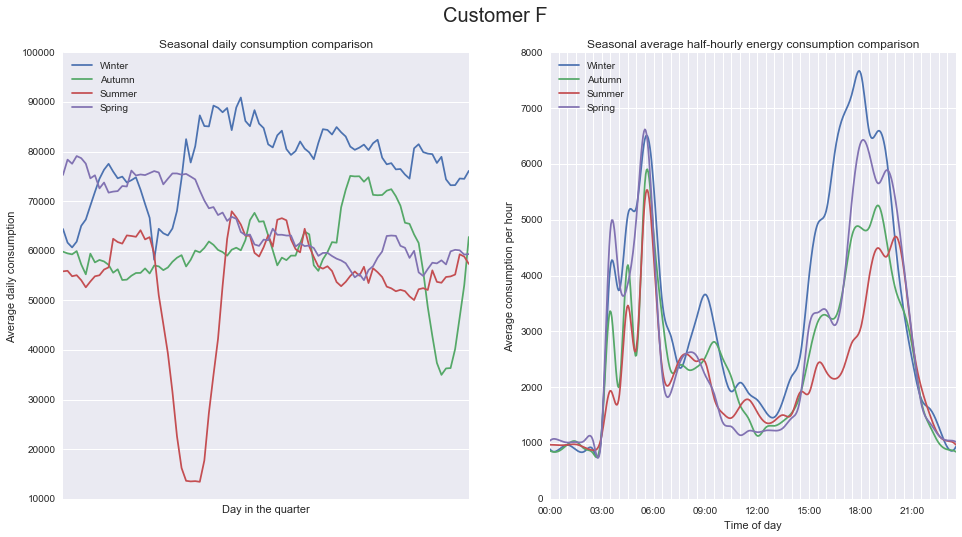

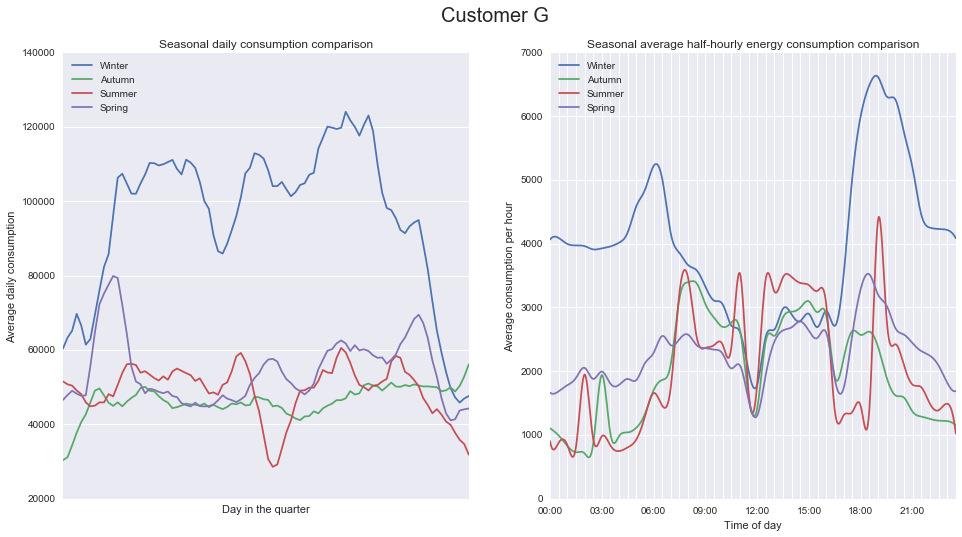

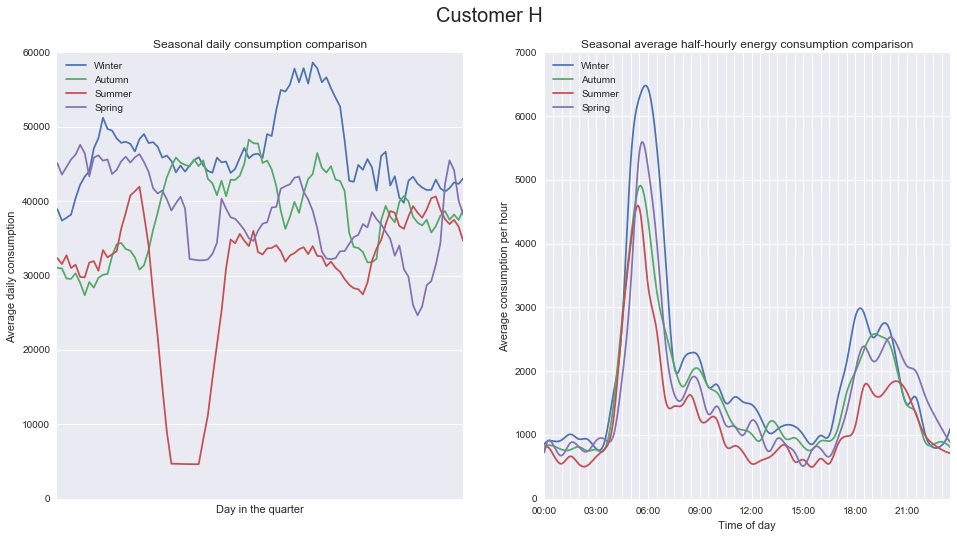

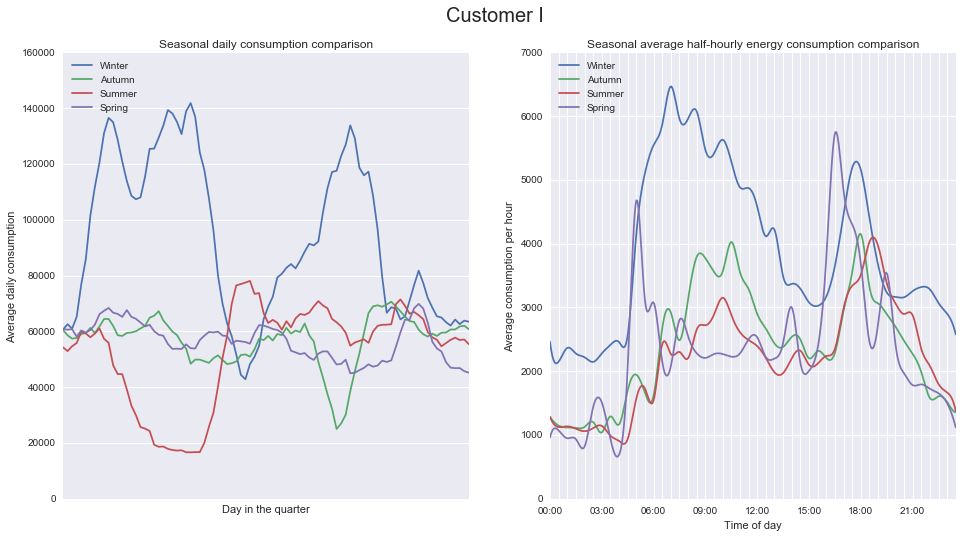

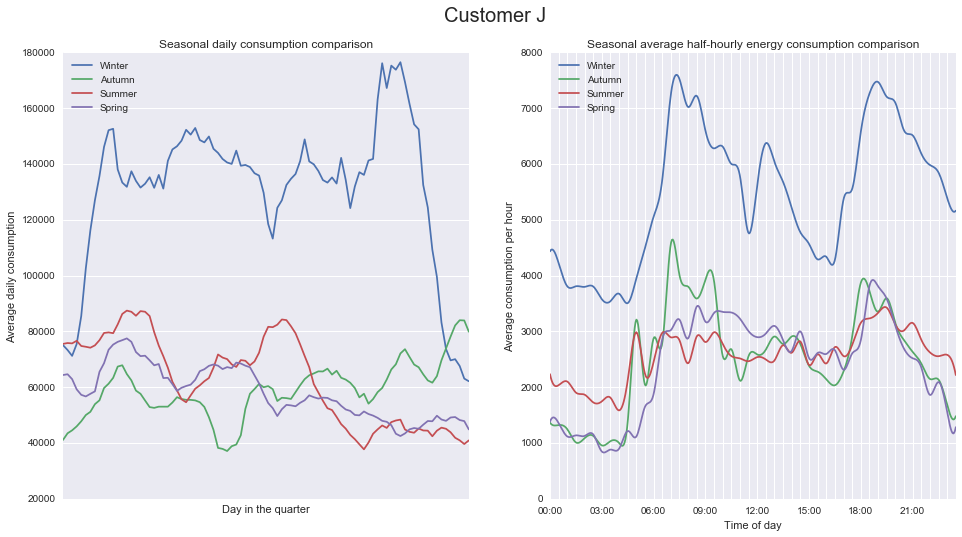

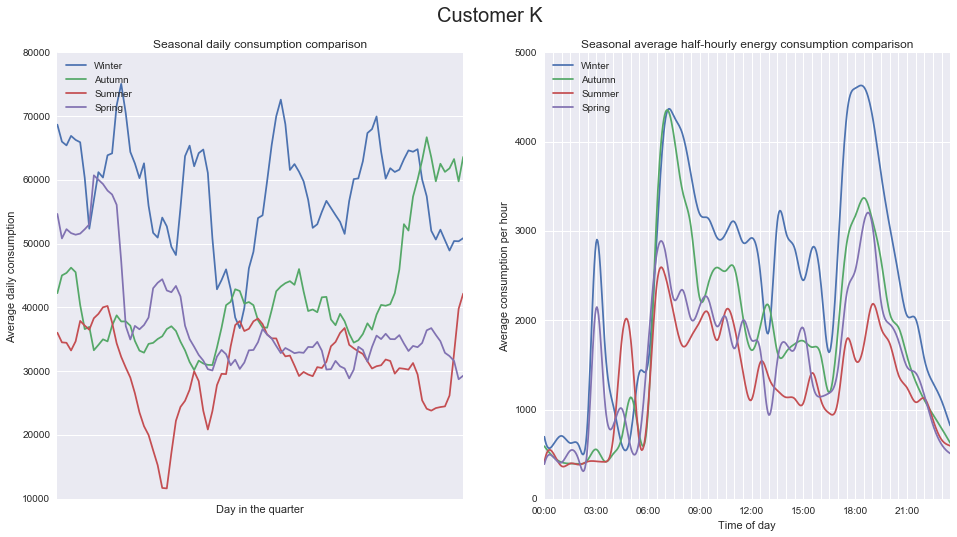

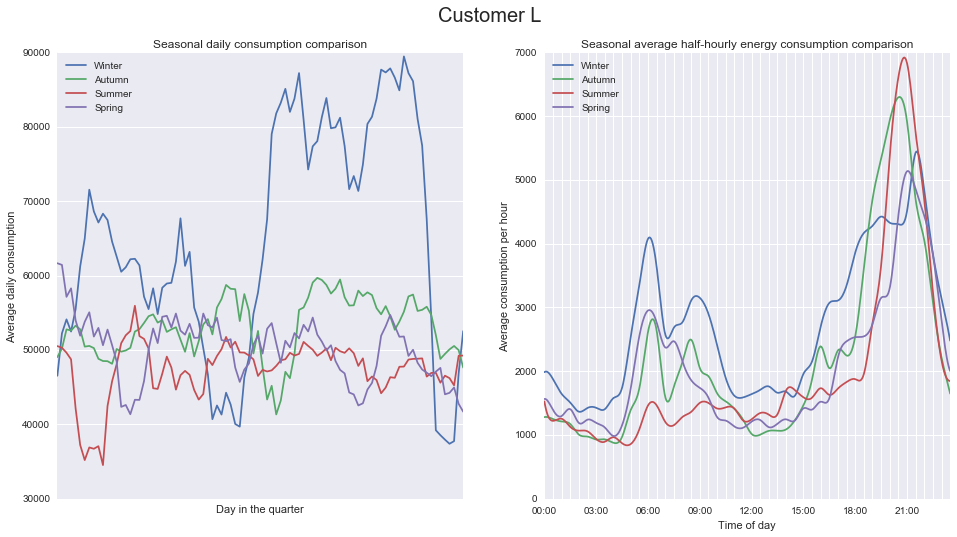

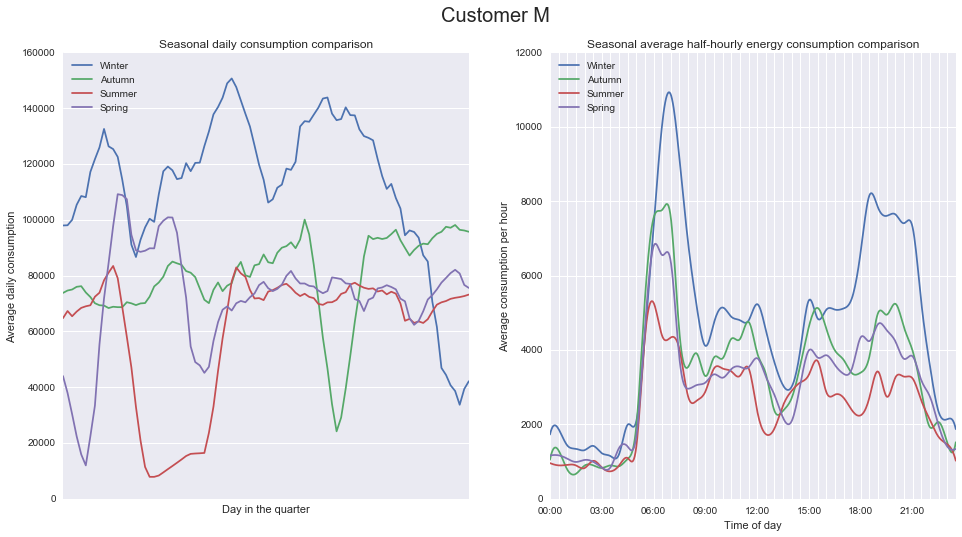

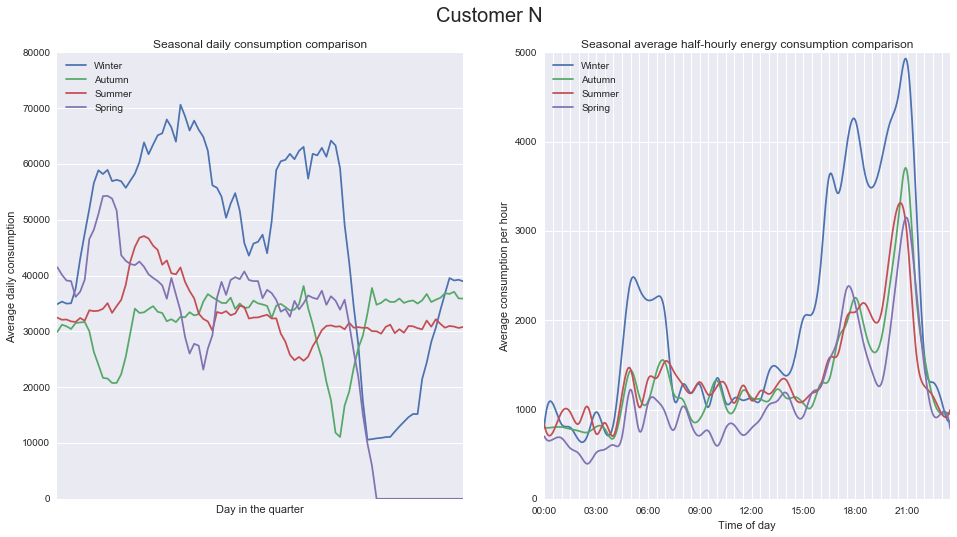

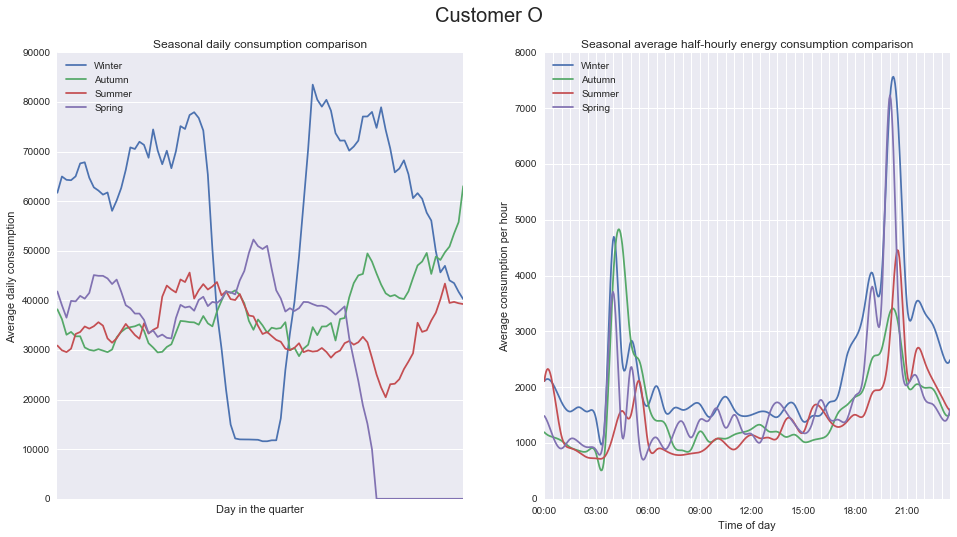

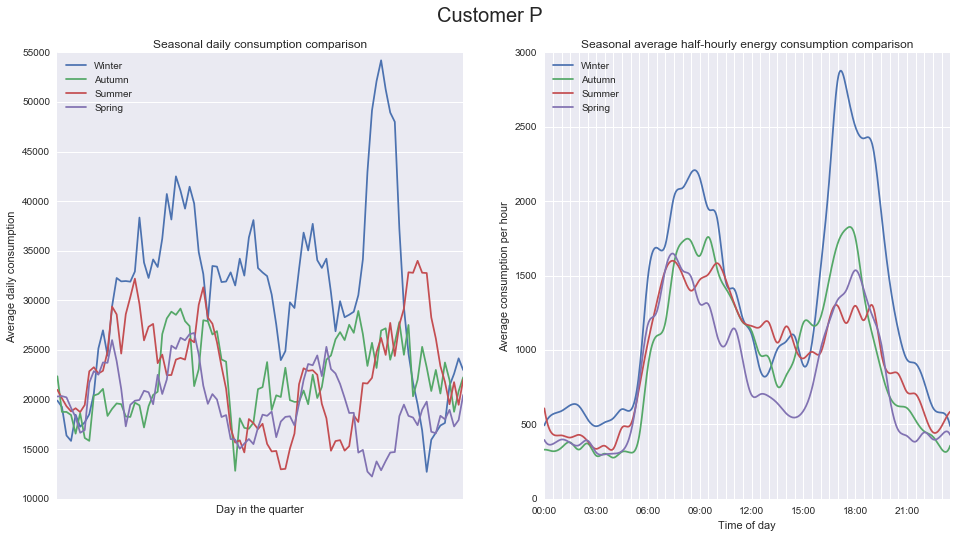

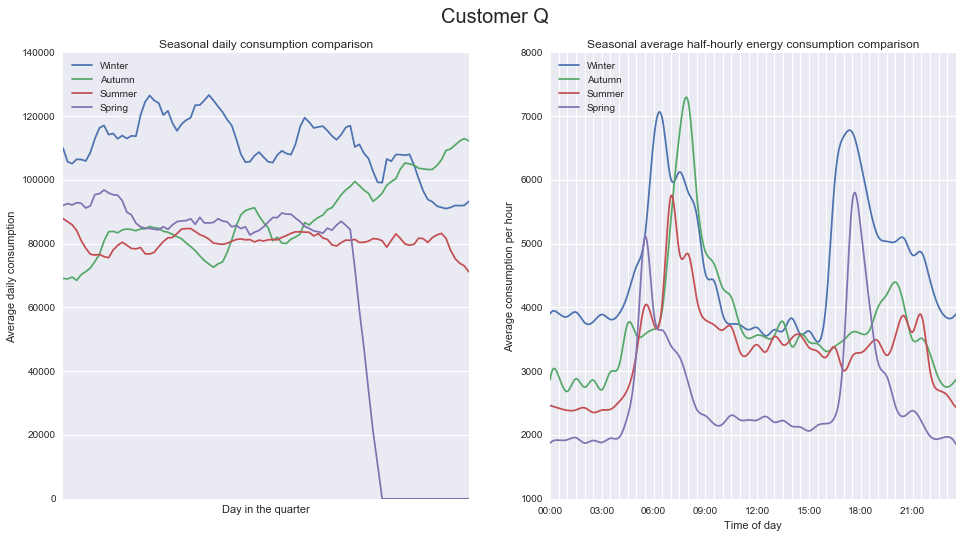

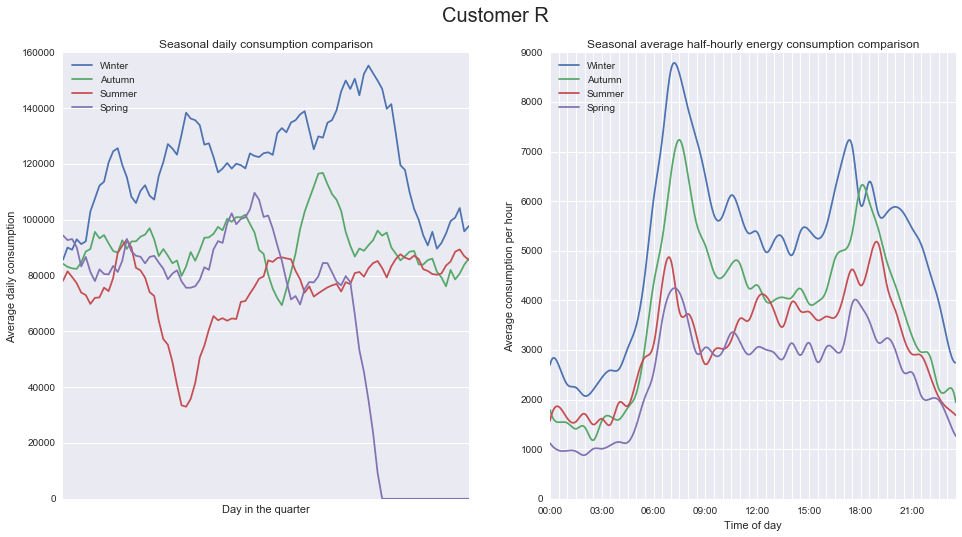

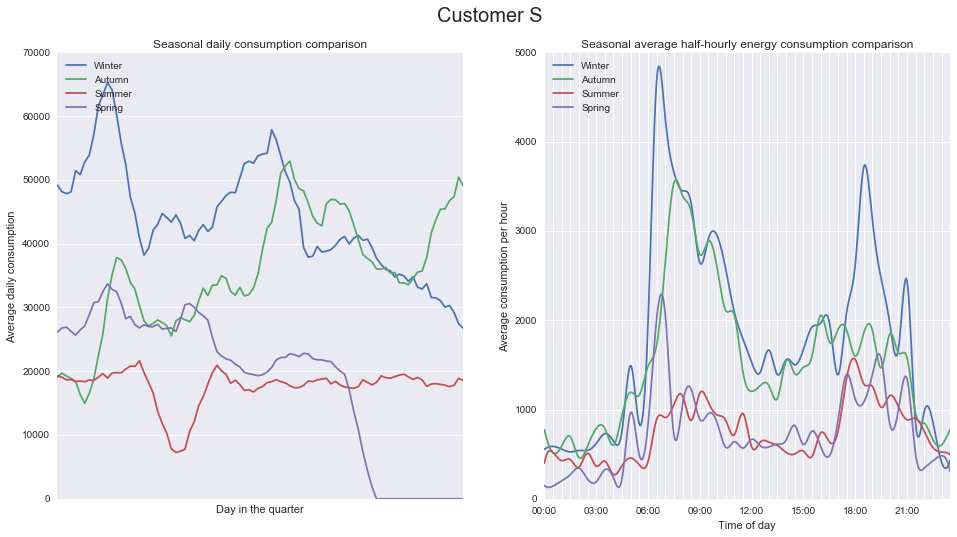

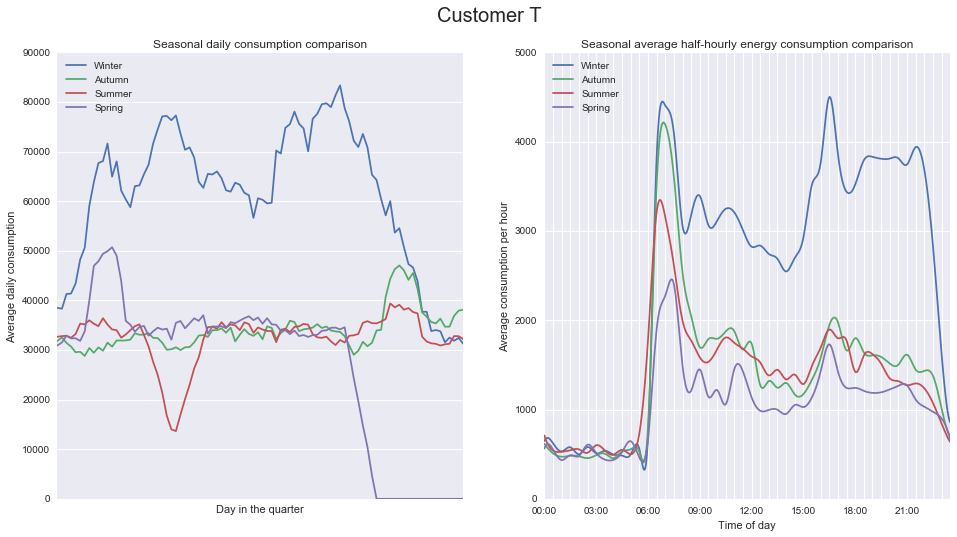

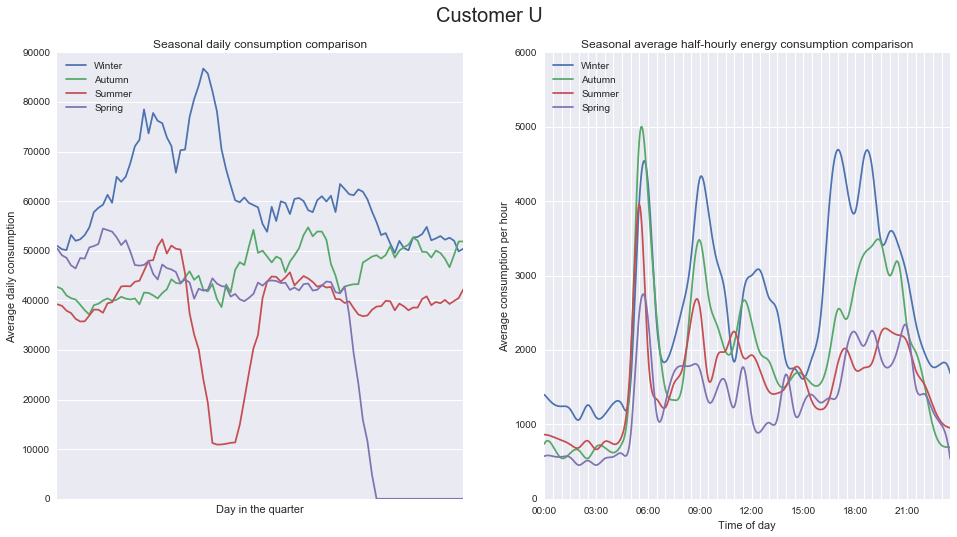

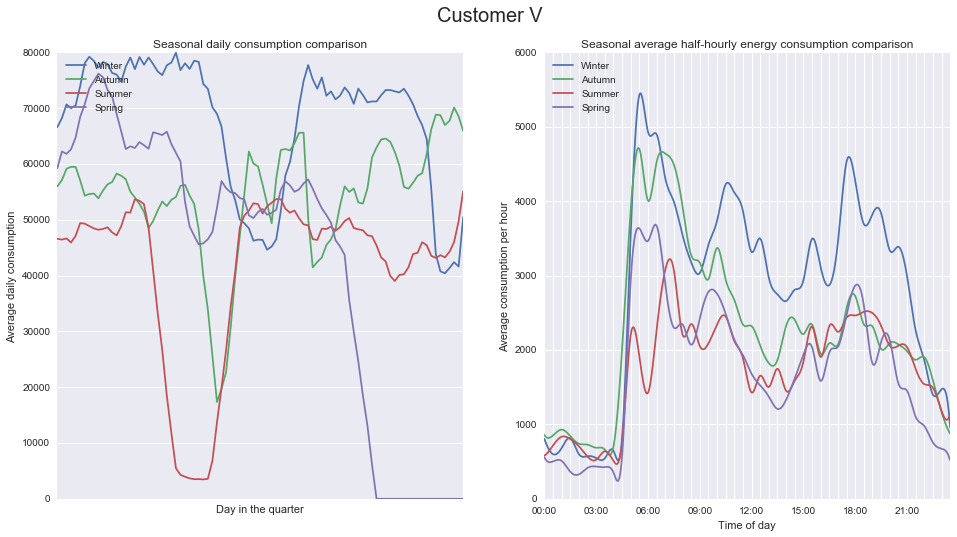

In [164]:
letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V']

for i in range(0,22):
    print letters[i]
    j = i + 1
    values_R = pd.DataFrame(values[1:,j:j+1].reshape(len(values[1:,j:j+1])/48,48))
    values_R.index = dates
    values_R.columns = times
    plt.figure(figsize=(16, 8))
    plt.suptitle('Customer ' + letters[i], fontsize=20)
    fig1 = plt.subplot(1,2,1)
    fig1.set_title("Seasonal daily consumption comparison")
    plt.xlabel('Day in the quarter')
    plt.ylabel('Average daily consumption')

    pd.rolling_mean(values_R.sum(axis=1),7)[len(values_R)-90*2-45:len(values_R)-90-45].transpose().plot(label='Winter')
    pd.rolling_mean(values_R.sum(axis=1),7)[len(values_R)-90*3-45:len(values_R)-90*2-45].transpose().plot(label='Autumn')
    pd.rolling_mean(values_R.sum(axis=1),7)[len(values_R)-90*4-45:len(values_R)-90*3-45].transpose().plot(label='Summer')
    pd.rolling_mean(values_R.sum(axis=1),7)[len(values_R)-90-45:len(values_R)-45].transpose().plot(label='Spring')
    plt.legend(loc='upper left')
    plt.xticks(range(0))

    fig2 = plt.subplot(1,2,2)
    fig2.set_title("Seasonal average half-hourly energy consumption comparison")
    plt.xlabel('Time of day')
    plt.ylabel('Average consumption per hour')

    x = np.linspace(0, 47, 48)
    x_n = np.linspace(0, 47, 480)

    day_winter = (values_R[len(values_R)-90*2-45:len(values_R)-90-45].mean(axis=0)*2).values.transpose()
    day_winter_cor = interp1d(x, day_winter, kind='cubic')
    plt.plot(x_n, day_winter_cor(x_n), label='Winter')
    day_autumn = (values_R[len(values_R)-90*3-45:len(values_R)-90*2-45].mean(axis=0)*2).values.transpose()
    day_autumn_cor = interp1d(x, day_autumn, kind='cubic')
    plt.plot(x_n, day_autumn_cor(x_n), label='Autumn')
    day_summer = (values_R[len(values_R)-90*4-45:len(values_R)-90*3-45].mean(axis=0)*2).values.transpose()
    day_summer_cor = interp1d(x, day_summer, kind='cubic')
    plt.plot(x_n, day_summer_cor(x_n), label='Summer')
    day_spring = (values_R[len(values_R)-90-45:len(values_R)-45].mean(axis=0)*2).values.transpose()
    day_spring_cor = interp1d(x, day_spring, kind='cubic')
    plt.plot(x_n, day_spring_cor(x_n), label='Spring')
    plt.legend(loc='upper left')
    plt.xticks(x, times_t)
    plt.xlim([0,47])
    plt.savefig("Customer" + letters[i] + ".png",dpi=500)

#A_values.index = dates
#A_values.columns = times
#B_values.index = dates
#B_values.columns = times
#C_values.index = dates
#C_values.columns = times
#D_values.index = dates
#D_values.columns = times
#E_values.index = dates
#E_values.columns = times
#F_values.index = dates
#F_values.columns = times

In [125]:
#TRESCIMO Trial Period Comparison
#pd.rolling_mean(A_values.mean(axis=1),7)[len(A_values)-90:len(A_values)].transpose().plot()
#pd.rolling_mean(A_values.mean(axis=1),7)[len(A_values)-90-365:len(A_values)-365].transpose().plot()
#pd.rolling_mean(A_values.mean(axis=1),7)[len(A_values)-90-365*2:len(A_values)-365*2].transpose().plot()

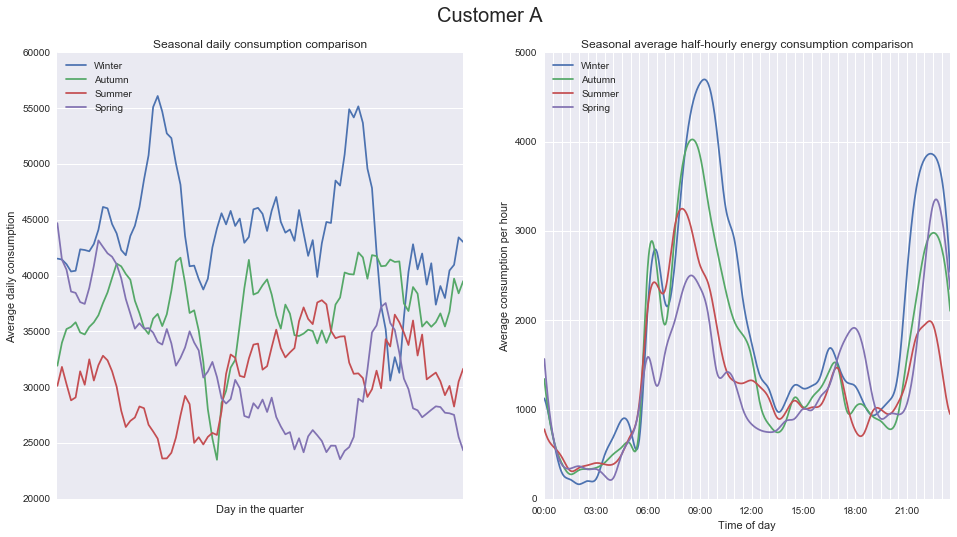

In [149]:
#Average daily consumption per quarter comparison
plt.figure(figsize=(16, 8))
plt.suptitle('Customer ' + 'A', fontsize=20)
fig1 = plt.subplot(1,2,1)
fig1.set_title("Seasonal daily consumption comparison")
plt.xlabel('Day in the quarter')
plt.ylabel('Average daily consumption')

pd.rolling_mean(A_values.sum(axis=1),7)[len(A_values)-90*2-45:len(A_values)-90-45].transpose().plot(label='Winter')
pd.rolling_mean(A_values.sum(axis=1),7)[len(A_values)-90*3-45:len(A_values)-90*2-45].transpose().plot(label='Autumn')
pd.rolling_mean(A_values.sum(axis=1),7)[len(A_values)-90*4-45:len(A_values)-90*3-45].transpose().plot(label='Summer')
pd.rolling_mean(A_values.sum(axis=1),7)[len(A_values)-90-45:len(A_values)-45].transpose().plot(label='Spring')
plt.legend(loc='upper left')
plt.xticks(range(0))

#Average hourly consumption per quarter comparison
fig2 = plt.subplot(1,2,2)
fig2.set_title("Seasonal average half-hourly energy consumption comparison")
plt.xlabel('Time of day')
plt.ylabel('Average consumption per hour')

x = np.linspace(0, 47, 48)
x_n = np.linspace(0, 47, 480)

day_winter = (A_values[len(A_values)-90*2-45:len(A_values)-90-45].mean(axis=0)*2).values.transpose()
day_winter_cor = interp1d(x, day_winter, kind='cubic')
plt.plot(x_n, day_winter_cor(x_n), label='Winter')
day_autumn = (A_values[len(A_values)-90*3-45:len(A_values)-90*2-45].mean(axis=0)*2).values.transpose()
day_autumn_cor = interp1d(x, day_autumn, kind='cubic')
plt.plot(x_n, day_autumn_cor(x_n), label='Autumn')
day_summer = (A_values[len(A_values)-90*4-45:len(A_values)-90*3-45].mean(axis=0)*2).values.transpose()
day_summer_cor = interp1d(x, day_summer, kind='cubic')
plt.plot(x_n, day_summer_cor(x_n), label='Summer')
day_spring = (A_values[len(A_values)-90-45:len(A_values)-45].mean(axis=0)*2).values.transpose()
day_spring_cor = interp1d(x, day_spring, kind='cubic')
plt.plot(x_n, day_spring_cor(x_n), label='Spring')
plt.legend(loc='upper left')
plt.xticks(x, times_t)
plt.xlim([0,47])
plt.savefig("test.png",dpi=500)

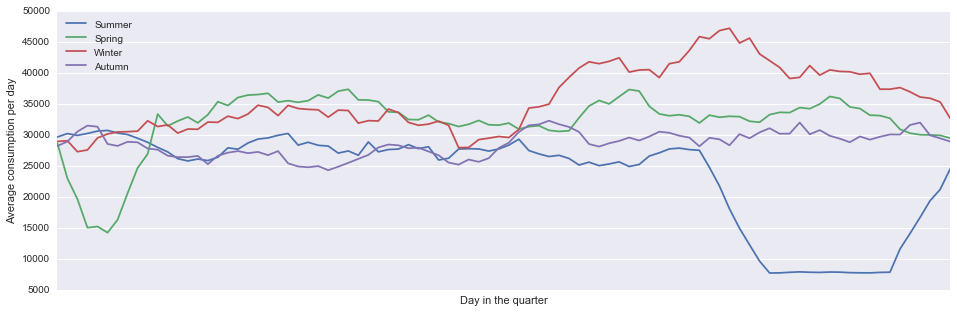

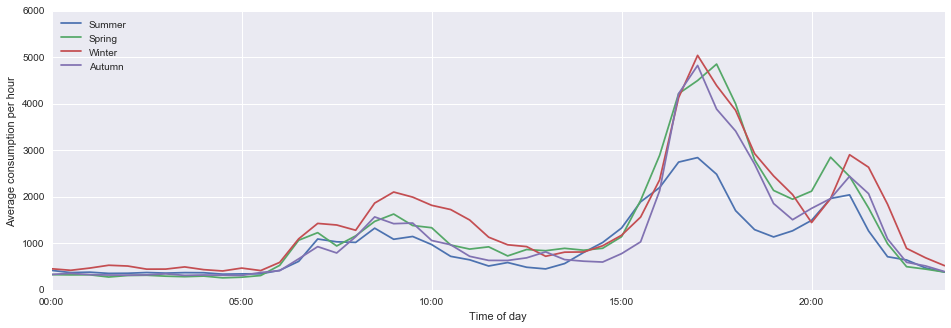

In [123]:
#Average daily consumption per quarter comparison
plt.figure(figsize=(16, 5));
plt.xlabel('Day in the quarter')
plt.ylabel('Average consumption per day')
pd.rolling_mean(B_values.sum(axis=1),7)[len(B_values)-90:len(B_values)].transpose().plot(label='Summer')
pd.rolling_mean(B_values.sum(axis=1),7)[len(B_values)-90*2:len(B_values)-90].transpose().plot(label='Spring')
pd.rolling_mean(B_values.sum(axis=1),7)[len(B_values)-90*3:len(B_values)-90*2].transpose().plot(label='Winter')
pd.rolling_mean(B_values.sum(axis=1),7)[len(B_values)-90*4:len(B_values)-90*3].transpose().plot(label='Autumn')
plt.legend(loc='upper left')
plt.xticks(range(0))
#Average hourly consumption per quarter comparison
plt.figure(figsize=(16, 5));
plt.xlabel('Time of day')
plt.ylabel('Average consumption per hour')
(B_values[len(B_values)-90:len(B_values)].mean(axis=0)*2).transpose().plot(label='Summer')
(B_values[len(B_values)-90*2:len(B_values)-90].mean(axis=0)*2).transpose().plot(label='Spring')
(B_values[len(B_values)-90*3:len(B_values)-90*2].mean(axis=0)*2).transpose().plot(label='Winter')
(B_values[len(B_values)-90*4:len(B_values)-90*3].mean(axis=0)*2).transpose().plot(label='Autumn')
plt.legend(loc='upper left')

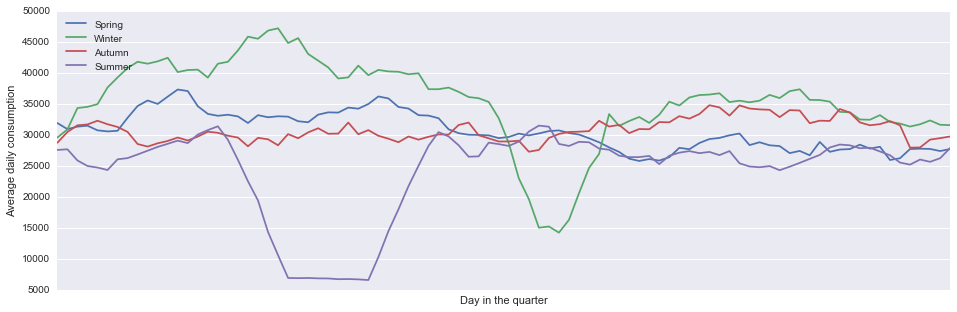

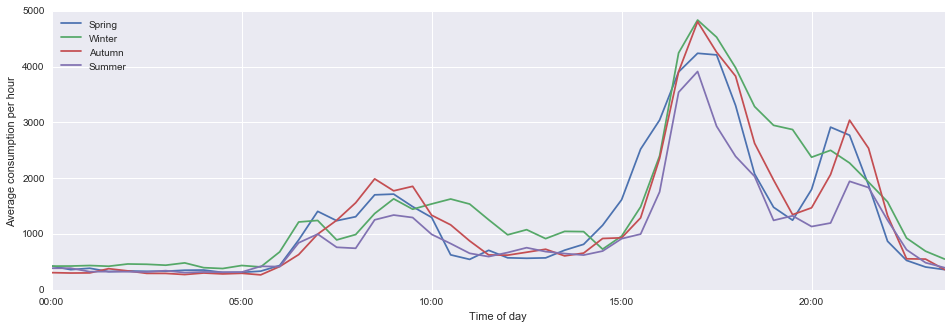

In [126]:
#Average daily consumption per quarter comparison
plt.figure(figsize=(16, 5))
plt.xlabel('Day in the quarter')
plt.ylabel('Average daily consumption')
pd.rolling_mean(B_values.sum(axis=1),7)[len(B_values)-90-45:len(B_values)-45].transpose().plot(label='Spring')
pd.rolling_mean(B_values.sum(axis=1),7)[len(B_values)-90*2-45:len(B_values)-90-45].transpose().plot(label='Winter')
pd.rolling_mean(B_values.sum(axis=1),7)[len(B_values)-90*3-45:len(B_values)-90*2-45].transpose().plot(label='Autumn')
pd.rolling_mean(B_values.sum(axis=1),7)[len(B_values)-90*4-45:len(B_values)-90*3-45].transpose().plot(label='Summer')
plt.legend(loc='upper left')
plt.xticks(range(0))

#Average hourly consumption per quarter comparison
plt.figure(figsize=(16, 5));
plt.xlabel('Time of day')
plt.ylabel('Average consumption per hour')
(B_values[len(B_values)-90-45:len(B_values)-45].mean(axis=0)*2).transpose().plot(label='Spring')
(B_values[len(B_values)-90*2-45:len(B_values)-90-45].mean(axis=0)*2).transpose().plot(label='Winter')
(B_values[len(B_values)-90*3-45:len(B_values)-90*2-45].mean(axis=0)*2).transpose().plot(label='Autumn')
(B_values[len(B_values)-90*4-45:len(B_values)-90*3-45].mean(axis=0)*2).transpose().plot(label='Summer')
plt.legend(loc='upper left')

In [ ]:
#Average daily consumption per quarter comparison
plt.figure(figsize=(16, 5))
plt.xlabel('Day in the quarter')
plt.ylabel('Average daily consumption')
pd.rolling_mean(C_values.sum(axis=1),7)[len(C_values)-90-45:len(C_values)-45].transpose().plot(label='Spring')
pd.rolling_mean(C_values.sum(axis=1),7)[len(C_values)-90*2-45:len(C_values)-90-45].transpose().plot(label='Winter')
pd.rolling_mean(C_values.sum(axis=1),7)[len(C_values)-90*3-45:len(C_values)-90*2-45].transpose().plot(label='Autumn')
pd.rolling_mean(C_values.sum(axis=1),7)[len(C_values)-90*4-45:len(C_values)-90*3-45].transpose().plot(label='Summer')
plt.legend(loc='upper left')
plt.xticks(range(0))

#Average hourly consumption per quarter comparison
plt.figure(figsize=(16, 5));
plt.xlabel('Time of day')
plt.ylabel('Average consumption per hour')
(C_values[len(C_values)-90-45:len(C_values)-45].mean(axis=0)*2).transpose().plot(label='Spring')
(C_values[len(C_values)-90*2-45:len(C_values)-90-45].mean(axis=0)*2).transpose().plot(label='Winter')
(C_values[len(C_values)-90*3-45:len(C_values)-90*2-45].mean(axis=0)*2).transpose().plot(label='Autumn')
(C_values[len(C_values)-90*4-45:len(C_values)-90*3-45].mean(axis=0)*2).transpose().plot(label='Summer')
plt.legend(loc='upper left')

In [ ]:
#Average daily consumption per quarter comparison
plt.figure(figsize=(16, 5))
plt.xlabel('Day in the quarter')
plt.ylabel('Average daily consumption')
pd.rolling_mean(D_values.sum(axis=1),7)[len(D_values)-90-45:len(D_values)-45].transpose().plot(label='Spring')
pd.rolling_mean(D_values.sum(axis=1),7)[len(D_values)-90*2-45:len(D_values)-90-45].transpose().plot(label='Winter')
pd.rolling_mean(D_values.sum(axis=1),7)[len(D_values)-90*3-45:len(D_values)-90*2-45].transpose().plot(label='Autumn')
pd.rolling_mean(D_values.sum(axis=1),7)[len(D_values)-90*4-45:len(D_values)-90*3-45].transpose().plot(label='Summer')
plt.legend(loc='upper left')
plt.xticks(range(0))

#Average hourly consumption per quarter comparison
plt.figure(figsize=(16, 5));
plt.xlabel('Time of day')
plt.ylabel('Average consumption per hour')
(D_values[len(D_values)-90-45:len(D_values)-45].mean(axis=0)*2).transpose().plot(label='Spring')
(D_values[len(D_values)-90*2-45:len(D_values)-90-45].mean(axis=0)*2).transpose().plot(label='Winter')
(D_values[len(D_values)-90*3-45:len(D_values)-90*2-45].mean(axis=0)*2).transpose().plot(label='Autumn')
(D_values[len(D_values)-90*4-45:len(D_values)-90*3-45].mean(axis=0)*2).transpose().plot(label='Summer')
plt.legend(loc='upper left')

In [ ]:
#Average daily consumption per quarter comparison
plt.figure(figsize=(16, 5))
plt.xlabel('Day in the quarter')
plt.ylabel('Average daily consumption')
pd.rolling_mean(E_values.sum(axis=1),7)[len(E_values)-90-45:len(E_values)-45].transpose().plot(label='Spring')
pd.rolling_mean(E_values.sum(axis=1),7)[len(E_values)-90*2-45:len(E_values)-90-45].transpose().plot(label='Winter')
pd.rolling_mean(E_values.sum(axis=1),7)[len(E_values)-90*3-45:len(E_values)-90*2-45].transpose().plot(label='Autumn')
pd.rolling_mean(E_values.sum(axis=1),7)[len(E_values)-90*4-45:len(E_values)-90*3-45].transpose().plot(label='Summer')
plt.legend(loc='upper left')
plt.xticks(range(0))

#Average hourly consumption per quarter comparison
plt.figure(figsize=(16, 5));
plt.xlabel('Time of day')
plt.ylabel('Average consumption per hour')
(E_values[len(E_values)-90-45:len(E_values)-45].mean(axis=0)*2).transpose().plot(label='Spring')
(E_values[len(E_values)-90*2-45:len(E_values)-90-45].mean(axis=0)*2).transpose().plot(label='Winter')
(E_values[len(E_values)-90*3-45:len(E_values)-90*2-45].mean(axis=0)*2).transpose().plot(label='Autumn')
(E_values[len(E_values)-90*4-45:len(E_values)-90*3-45].mean(axis=0)*2).transpose().plot(label='Summer')
plt.legend(loc='upper left')

In [ ]:
#Average daily consumption per quarter comparison
plt.figure(figsize=(16, 5))
plt.xlabel('Day in the quarter')
plt.ylabel('Average daily consumption')
pd.rolling_mean(F_values.sum(axis=1),7)[len(F_values)-90-45:len(F_values)-45].transpose().plot(label='Spring')
pd.rolling_mean(F_values.sum(axis=1),7)[len(F_values)-90*2-45:len(F_values)-90-45].transpose().plot(label='Winter')
pd.rolling_mean(F_values.sum(axis=1),7)[len(F_values)-90*3-45:len(F_values)-90*2-45].transpose().plot(label='Autumn')
pd.rolling_mean(F_values.sum(axis=1),7)[len(F_values)-90*4-45:len(F_values)-90*3-45].transpose().plot(label='Summer')
plt.legend(loc='upper left')
plt.xticks(range(0))

#Average hourly consumption per quarter comparison
plt.figure(figsize=(16, 5));
plt.xlabel('Time of day')
plt.ylabel('Average consumption per hour')
(F_values[len(F_values)-90-45:len(F_values)-45].mean(axis=0)*2).transpose().plot(label='Spring')
(F_values[len(F_values)-90*2-45:len(F_values)-90-45].mean(axis=0)*2).transpose().plot(label='Winter')
(F_values[len(F_values)-90*3-45:len(F_values)-90*2-45].mean(axis=0)*2).transpose().plot(label='Autumn')
(F_values[len(F_values)-90*4-45:len(F_values)-90*3-45].mean(axis=0)*2).transpose().plot(label='Summer')
plt.legend(loc='upper left')